 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1163.998, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1165.957, Time=0.11 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1167.052, Time=0.34 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1165.953, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1167.908, Time=0.49 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1168.095, Time=0.85 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1167.236, Time=0.31 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1168.537, Time=0.81 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1074.783, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1076.776, Time=0.25 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1078.041, Time=0.73 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1076.776, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1078.783, Time=0.36 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1078.961, Time=1.45 sec


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


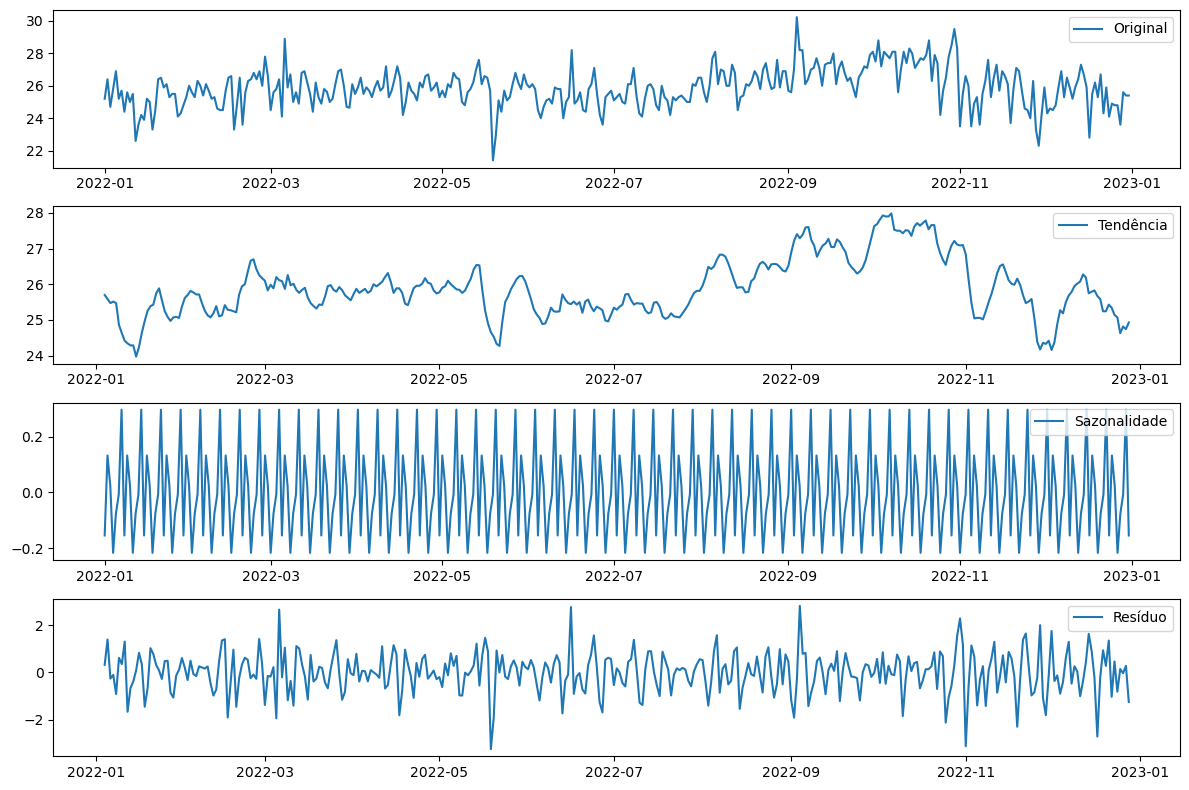

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pmdarima.arima import auto_arima

# Carregamento da base de dados
base = pd.read_csv('bh.csv', sep=';', decimal=',', usecols=['DATA', 'TEMPERATURA'])
base['DATA'] = pd.to_datetime(base['DATA'], format='%d/%m/%Y')
base.set_index('DATA', inplace=True)
base['TEMPERATURA'] = base['TEMPERATURA'].astype(float)

# Série Temporal
ts = base['TEMPERATURA']

# Decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

# Componentes da decomposição
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Exemplo de visualização dos componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Resíduo')
plt.legend(loc='best')
plt.tight_layout()

# Encontrar o melhor modelo ARIMA
stepwise_model = auto_arima(ts, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)
print("AIC do melhor modelo:", stepwise_model.aic())

# Treinar o modelo ARIMA com todos os dados
best_order = stepwise_model.get_params()['order']
best_seasonal_order = stepwise_model.get_params()['seasonal_order']
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=365)

# Plotar a série temporal original e as previsões
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Série Original')
plt.plot(forecast, color='red', label='Previsões')
plt.legend(loc='best')
plt.title('Série Temporal Original e Previsões')
plt.show()


In [10]:
print(stepwise_model.aic())

1046.2746895794317


In [11]:
train = base.loc['2022-01-01':'2022-12-31']
test = base.loc['2023-01-01':]

In [12]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

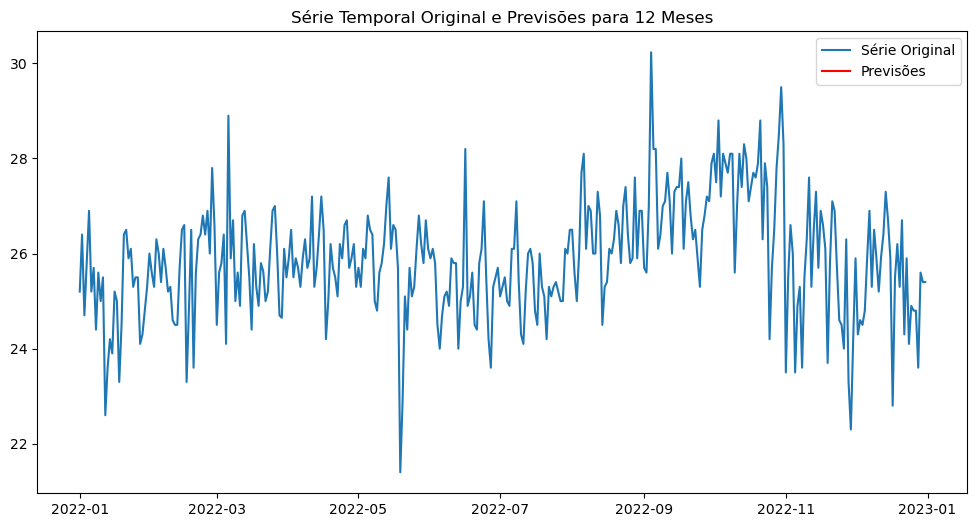

In [13]:
# Fazendo previsões para 12 meses à frente
future_forecast = stepwise_model.predict(n_periods=12)

# Criando um índice de datas para as previsões futuras
index = pd.date_range(start=ts.index[-1], periods=13, freq='M')[1:]

# Criando um DataFrame para armazenar as previsões
forecast_df = pd.DataFrame(data=future_forecast, index=index, columns=['Previsões'])

# Plotando a série temporal original e as previsões
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Série Original')
plt.plot(forecast_df, color='red', label='Previsões')
plt.legend(loc='best')
plt.title('Série Temporal Original e Previsões para 12 Meses')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1360.416, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1229.236, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1333.891, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1208.252, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1237.115, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1184.135, Time=0.41 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1201.472, Time=0.24 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.03 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1163.451, Time=0.54 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1181.6

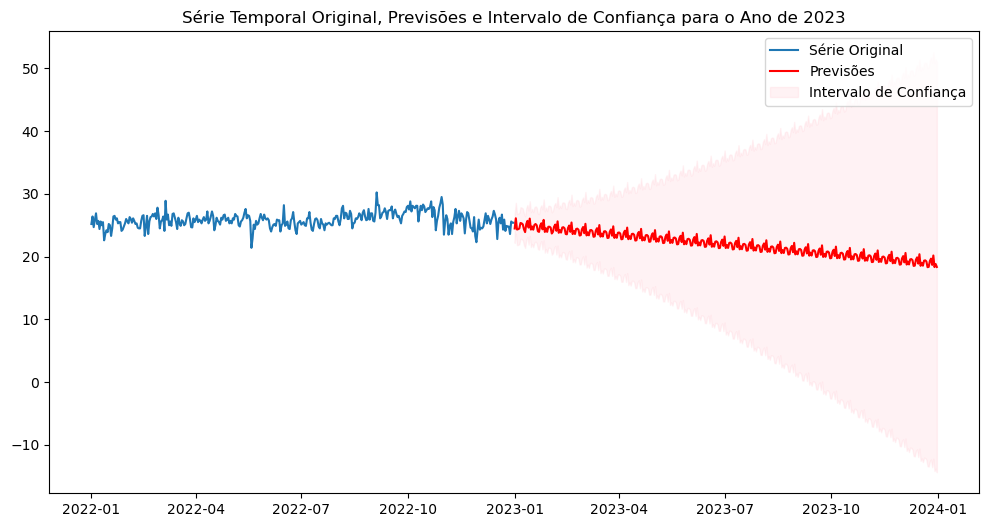

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Carregar os dados
# Substitua esta linha pelo código de carregamento dos seus dados
# ts = pd.read_csv('seu_arquivo.csv', index_col='data', parse_dates=True)

# Configurar o modelo de previsão automática
stepwise_model = auto_arima(ts, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True, d=1, D=1, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Fazendo previsões para cada dia de 2023
forecast, conf_int = stepwise_model.predict(n_periods=365, return_conf_int=True)

# Criando um índice de datas para as previsões de cada dia do ano de 2023
start_date = '2023-01-01'
index = pd.date_range(start=start_date, periods=365, freq='D')

# Criando um DataFrame com as previsões e intervalos de confiança
forecast_df = pd.DataFrame({'Previsão': forecast, 'Intervalo Inferior': conf_int[:, 0], 'Intervalo Superior': conf_int[:, 1]},
                            index=index)

# Plotando a série temporal original, previsões e intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Série Original')
plt.plot(forecast_df['Previsão'], color='red', label='Previsões')
plt.fill_between(forecast_df.index, forecast_df['Intervalo Inferior'], forecast_df['Intervalo Superior'],
                 color='pink', alpha=0.2, label='Intervalo de Confiança')
plt.legend(loc='best')
plt.title('Série Temporal Original, Previsões e Intervalo de Confiança para o Ano de 2023')
plt.show()



In [19]:
train = base.loc['2022-01-01':'2022-12-31']
test = base.loc['2023-01-01':]

In [20]:
stepwise_model.fit(train)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)